<a href="https://colab.research.google.com/github/poornanandini/IOT-DA-task-1-data-base/blob/main/IOT_DA_lab_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Employee_Data = pd.read_csv('https://raw.githubusercontent.com/poornanandini/IOT-DA-task-1-data-base/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')  


In [ ]:
data = Employee_Data.head()  
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
Employee_Data.isna().sum()  ## checking for missing values in the data set

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

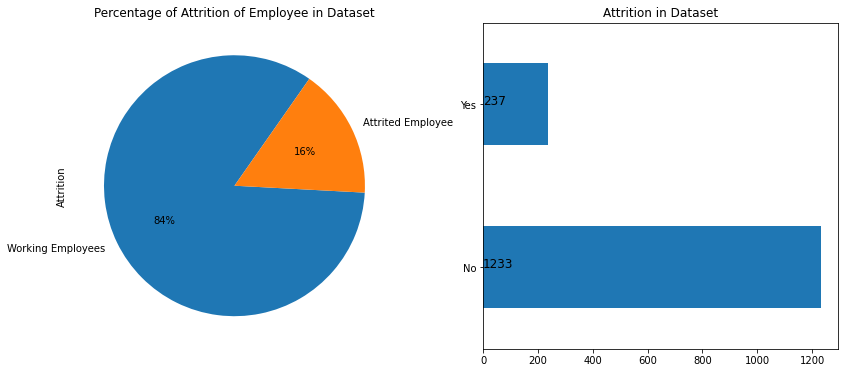

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = Employee_Data['Attrition'].value_counts().plot.pie( x="Attrition" ,y ='no.of employees', 
                   autopct = "%1.0f%%",labels=["Working Employees","Attrited Employee"], startangle = 55,ax=ax1);
ax1.set(title = 'Percentage of Attrition of Employee in Dataset')
ax2 = Employee_Data["Attrition"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(Employee_Data["Attrition"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'Attrition in Dataset')
plt.show()



In [ ]:
#### Dropping the unnessecary features, which do not bring any impact on the analysis ####


In [ ]:
Employee_Data = Employee_Data.drop(['EmployeeCount','EmployeeNumber','StandardHours', 'Over18'], axis = 1)


In [ ]:
#### Attrition is our target variable, it has two values, Yes/ No. We replace these two values with 1 and 0 respectively. ####


In [ ]:
Employee_Data.Attrition.replace(['Yes','No'],[1,0],inplace=True)
Employee_Data.OverTime.replace(['Yes','No'],[1,0],inplace=True)

In [ ]:
#### understanding the object type features and numeric features ####

In [ ]:
object_features = Employee_Data.select_dtypes(include= ['object'])
numerical_features = Employee_Data.select_dtypes(exclude= ['object'])

In [ ]:
object_features

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [ ]:
numerical_features

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [ ]:
### Exploring the relation between target variable 'Attrition' and other categorical variables ###


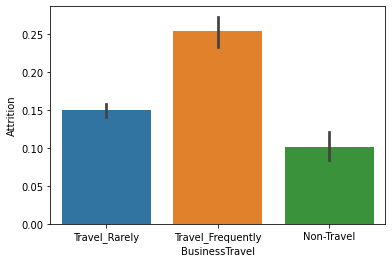

In [ ]:
sns.barplot(x = Employee_Data['BusinessTravel'],y = Employee_Data['Attrition']  )   ## Understanding relation between Attrition and Business Travel


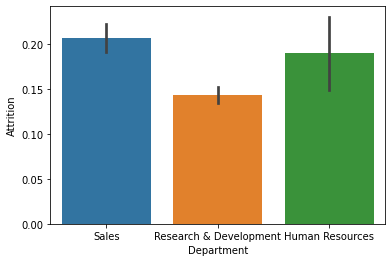

In [ ]:
sns.barplot(x = Employee_Data['Department'],y = Employee_Data['Attrition']  )   ## Understanding relation between Attrition and Department


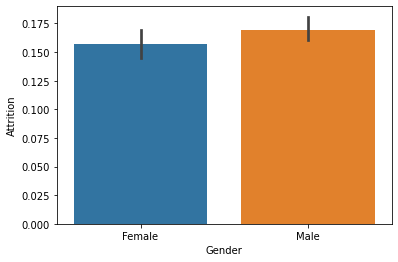

In [ ]:
sns.barplot(x = Employee_Data['Gender'],y = Employee_Data['Attrition']  )   ## Understanding relation between Attrition and Gender


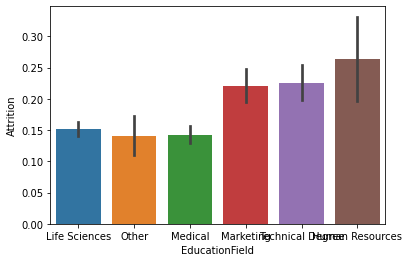

In [ ]:
sns.barplot(x = Employee_Data['EducationField'],y = Employee_Data['Attrition']  )   ## Understanding relation between Attrition and Education Field


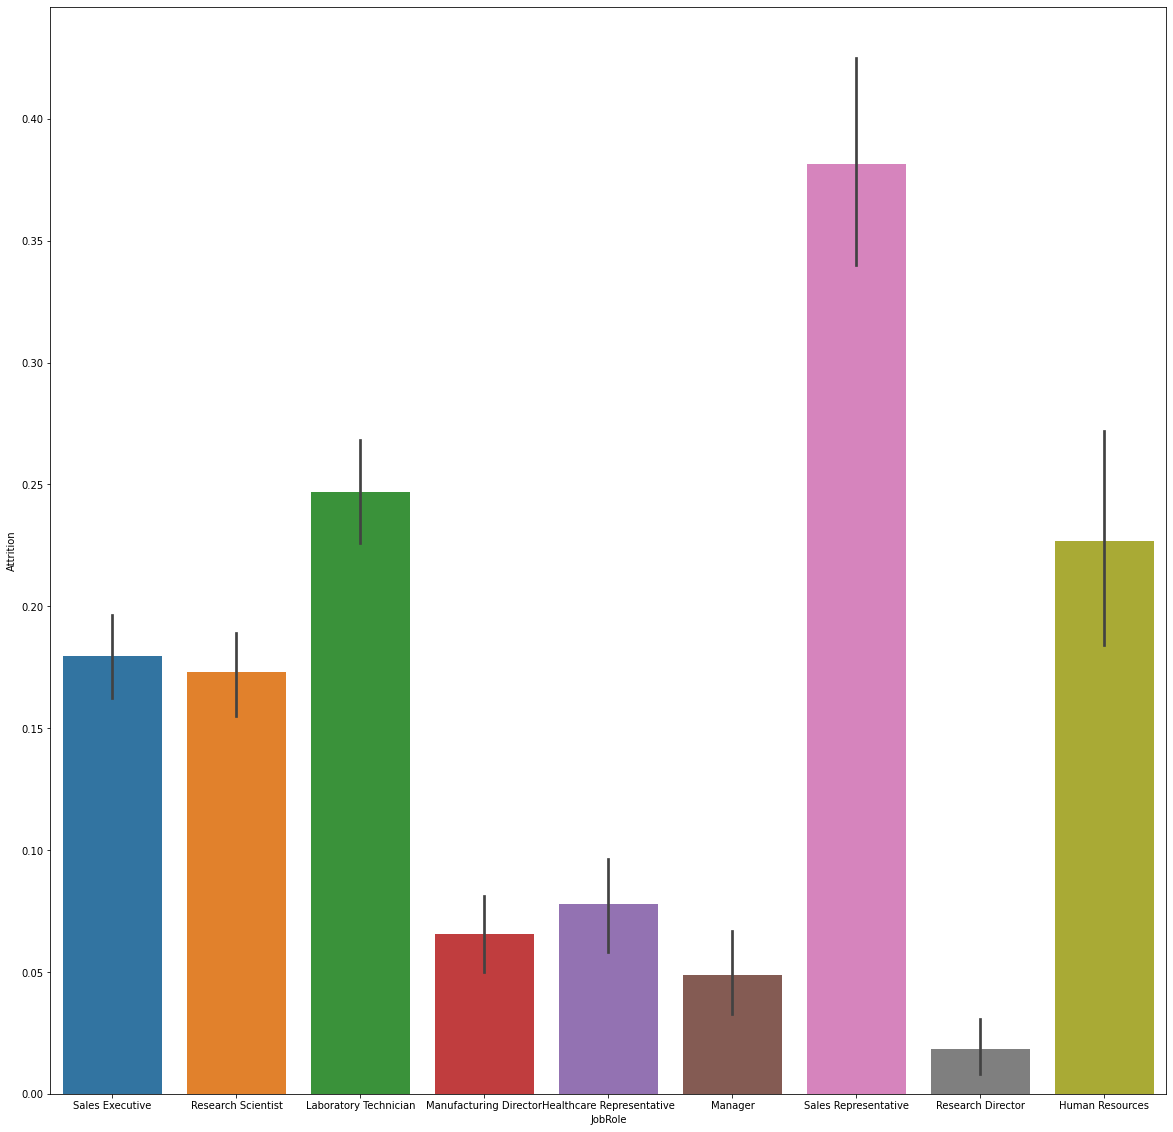

In [ ]:
plt.figure(figsize = (20,20))
sns.barplot(x = Employee_Data['JobRole'],y = Employee_Data['Attrition']  )
## Understanding relation between Attrition and Job Role
plt.show()

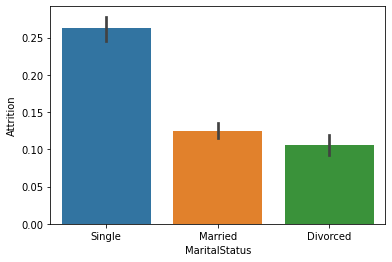

In [ ]:
sns.barplot(x = Employee_Data['MaritalStatus'],y = Employee_Data['Attrition']  )   ## Understanding relation between Attrition and Marital Status


In [ ]:
### Understanding relation between target variable 'Attrition' and numeric features ###


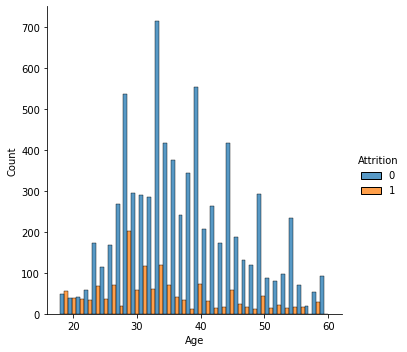

In [ ]:
sns.displot(Employee_Data, x="Age", hue = 'Attrition', multiple = 'dodge')


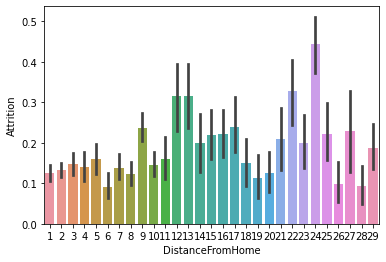

In [ ]:
sns.barplot(x = Employee_Data['DistanceFromHome'],y = Employee_Data['Attrition']  )   ## Understanding relation between Attrition and Distance from home


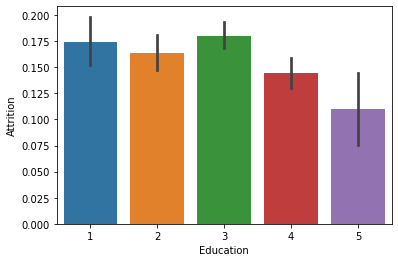

In [ ]:
sns.barplot(x = Employee_Data['Education'],y = Employee_Data['Attrition']  ) 


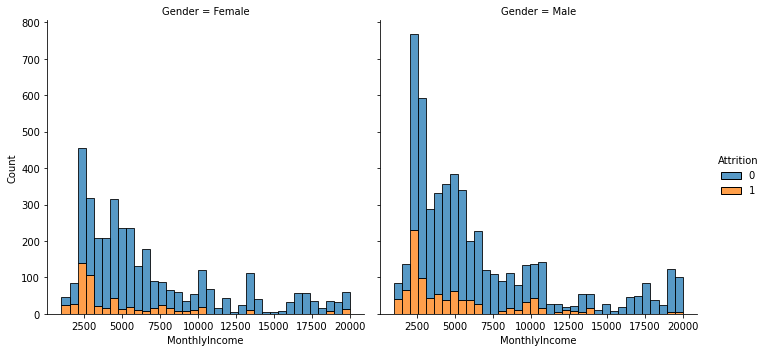

In [ ]:
sns.displot(Employee_Data, x="MonthlyIncome", hue = 'Attrition', multiple = 'stack', col = 'Gender' )


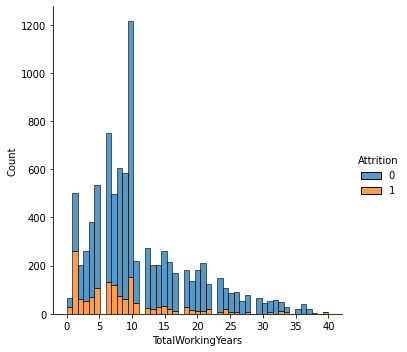

In [ ]:
sns.displot(Employee_Data, x="TotalWorkingYears", hue = 'Attrition', multiple = 'stack' )


In [ ]:
##### One hot encoding for categorical variables #######


In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
employee_df_department = pd.get_dummies(Employee_Data['Department'],prefix = 'Department')


In [ ]:
employee_df_department


,Department_Human Resources,Department_Research & Development,Department_Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
8938,0,1,0
8939,0,1,0
8940,0,0,1
8941,0,0,1


In [ ]:
employee_df_BusinessTravel = pd.get_dummies(Employee_Data['BusinessTravel'],prefix = 'BusinessTravel')
employee_df_BusinessTravel

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
8938,0,1,0
8939,0,0,1
8940,0,0,1
8941,0,0,1


In [ ]:
employee_df_Gender = pd.get_dummies(Employee_Data['Gender'],prefix = 'Gender', drop_first = True)
employee_df_Gender

,Gender_Male
0,0
1,1
2,1
3,0
4,1
...,...
8938,1
8939,1
8940,1
8941,0


In [ ]:
employee_df_EducationField = pd.get_dummies(Employee_Data['EducationField'],prefix = 'EducationField')


In [ ]:
employee_df_EducationField


,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
8938,0,1,0,0,0,0
8939,0,0,0,0,0,1
8940,0,1,0,0,0,0
8941,0,1,0,0,0,0


In [ ]:
employee_df_JobRole = pd.get_dummies(Employee_Data['JobRole'],prefix = 'JobRole')
employee_df_JobRole

,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
8938,0,0,0,0,0,0,1,0,0
8939,0,0,1,0,0,0,0,0,0
8940,0,0,0,0,0,0,0,0,1
8941,0,0,0,0,0,0,0,1,0


In [ ]:
employee_df_MaritalStatus = pd.get_dummies(Employee_Data['MaritalStatus'],prefix = 'MaritalStatus')
employee_df_MaritalStatus

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
8938,0,1,0
8939,1,0,0
8940,0,0,1
8941,0,1,0


In [ ]:
employee_df_OverTime= pd.get_dummies(Employee_Data['OverTime'],prefix = 'OverTime', drop_first = True)
employee_df_OverTime

,OverTime_1
0,1
1,0
2,1
3,1
4,0
...,...
8938,0
8939,0
8940,0
8941,1


In [ ]:
### dropping the columns which have been encoded, to avoid redundant data ###


In [ ]:
Employee_Data = Employee_Data.drop(['Department', 'BusinessTravel','EducationField','Gender','JobRole','MaritalStatus','OverTime'], axis = 1)


In [ ]:
### Now, concatenating the dataset, with the newly created encoded columns ###


In [ ]:
Employee_Data = pd.concat([Employee_Data,employee_df_department,employee_df_BusinessTravel,employee_df_Gender,employee_df_EducationField,employee_df_JobRole,employee_df_MaritalStatus,employee_df_OverTime],axis = 1)


In [ ]:
data = Employee_Data.head()
data

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_1
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
##### separating the target variable #####

In [ ]:
y_df = Employee_Data['Attrition']
x_df = Employee_Data.drop(['Attrition'], axis = 1)

In [ ]:
y_df

0       1
1       0
2       1
3       0
4       0
       ..
8938    0
8939    1
8940    0
8941    0
8942    0
Name: Attrition, Length: 8943, dtype: int64

In [ ]:
#### Train-test split, 70% of the data set used for training, remaining 30% used for testing.


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(x_df,y_df,test_size=0.33,random_state=1)

In [ ]:
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_1
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
data.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_1
Age,1.000000,0.176090,-0.342635,0.669085,-0.246094,0.286644,0.442971,-0.616316,0.836428,0.086459,0.588352,0.280627,-0.474912,0.754785,0.781788,-0.129452,0.066034,0.902230,-0.242624,-0.242624,0.593023,4.302656e-01,-0.517809,0.758710,NaN,-0.242624,2.426237e-01,NaN,0.396203,-0.396203,0.044023,NaN,0.594304,NaN,-0.700913,-0.026958,NaN,NaN,NaN,-0.594304,NaN,NaN,NaN,0.396203,2.426237e-01,NaN,NaN,-0.176090,0.176090,-0.066034
Attrition,0.176090,1.000000,0.535987,-0.559259,0.000000,0.140028,0.943951,-0.166667,0.166667,0.763763,0.070132,-0.651352,0.479463,-0.251610,-0.408248,-0.910182,-0.666667,-0.184637,-0.612372,-0.612372,-0.484248,-5.923489e-01,-0.840168,-0.087932,NaN,-0.612372,6.123724e-01,NaN,-0.666667,0.666667,-0.166667,NaN,-0.166667,NaN,-0.408248,0.612372,NaN,NaN,NaN,0.166667,NaN,NaN,NaN,-0.666667,6.123724e-01,NaN,NaN,-1.000000,1.000000,0.666667
DailyRate,-0.342635,0.535987,1.000000,-0.678393,0.790740,0.554323,0.505131,0.224298,-0.474647,0.713262,-0.489612,-0.466937,0.047703,-0.664914,-0.756238,-0.682852,-0.946707,-0.358055,-0.174917,-0.174917,-0.355324,-2.726748e-01,-0.018395,-0.750346,NaN,-0.174917,1.749169e-01,NaN,-0.206746,0.206746,-0.553539,NaN,-0.063927,NaN,-0.403237,0.481530,NaN,NaN,NaN,0.063927,NaN,NaN,NaN,-0.206746,1.749169e-01,NaN,NaN,-0.535987,0.535987,0.946707
DistanceFromHome,0.669085,-0.559259,-0.678393,1.000000,-0.294245,0.221116,-0.319191,-0.592157,0.427669,-0.624559,0.234714,0.496303,-0.733453,0.915239,0.966988,0.635708,0.592157,0.801784,0.443203,0.443203,0.669085,6.138357e-01,0.124378,0.584333,NaN,0.443203,-4.432026e-01,NaN,0.756644,-0.756644,0.394771,NaN,0.394771,NaN,-0.241747,-0.241747,NaN,NaN,NaN,-0.394771,NaN,NaN,NaN,0.756644,-4.432026e-01,NaN,NaN,0.559259,-0.559259,-0.592157
Education,-0.246094,0.000000,0.790740,-0.294245,1.000000,0.626224,0.095156,0.372678,-0.372678,0.487950,-0.353002,0.109148,-0.428845,-0.522430,-0.456435,-0.313112,-0.745356,0.000000,0.000000,0.000000,0.196875,3.311331e-01,0.469668,-0.589863,NaN,0.000000,0.000000e+00,NaN,0.372678,-0.372678,-0.745356,NaN,0.372678,NaN,-0.456435,0.000000,NaN,NaN,NaN,-0.372678,NaN,NaN,NaN,0.372678,0.000000e+00,NaN,NaN,0.000000,0.000000,0.745356
EnvironmentSatisfaction,0.286644,0.140028,0.554323,0.221116,0.626224,1.000000,0.346159,-0.490098,-0.210042,0.183340,-0.478536,-0.211819,-0.704952,0.203845,0.085749,-0.176471,-0.560112,0.361961,0.342997,0.342997,0.147945,1.866272e-01,0.029412,-0.381699,NaN,0.342997,-3.429972e-01,NaN,0.490098,-0.490098,-0.140028,NaN,0.210042,NaN,-0.771744,0.514496,NaN,NaN,NaN,-0.210042,NaN,NaN,NaN,0.490098,-3.429972e-01,NaN,NaN,-0.140028,0.140028,0.560112
HourlyRate,0.442971,0.943951,0.505131,-0.319191,0.095156,0.346159,1.000000,-0.305624,0.344310,0.780049,0.173347,-0.481209,0.183633,-0.054649,-0.180048,-0.897088,-0.700226,0.132859,-0.601740,-0.601740,-0.208457,-3.334267e-01,-0.833707,0.056469,NaN,-0.601740,6.017403e-01,NaN,-0.390734,0.390734,-0.247594,NaN,0.100585,NaN,-0.677550,0.554359,NaN,NaN,NaN,-0.100585,NaN,NaN

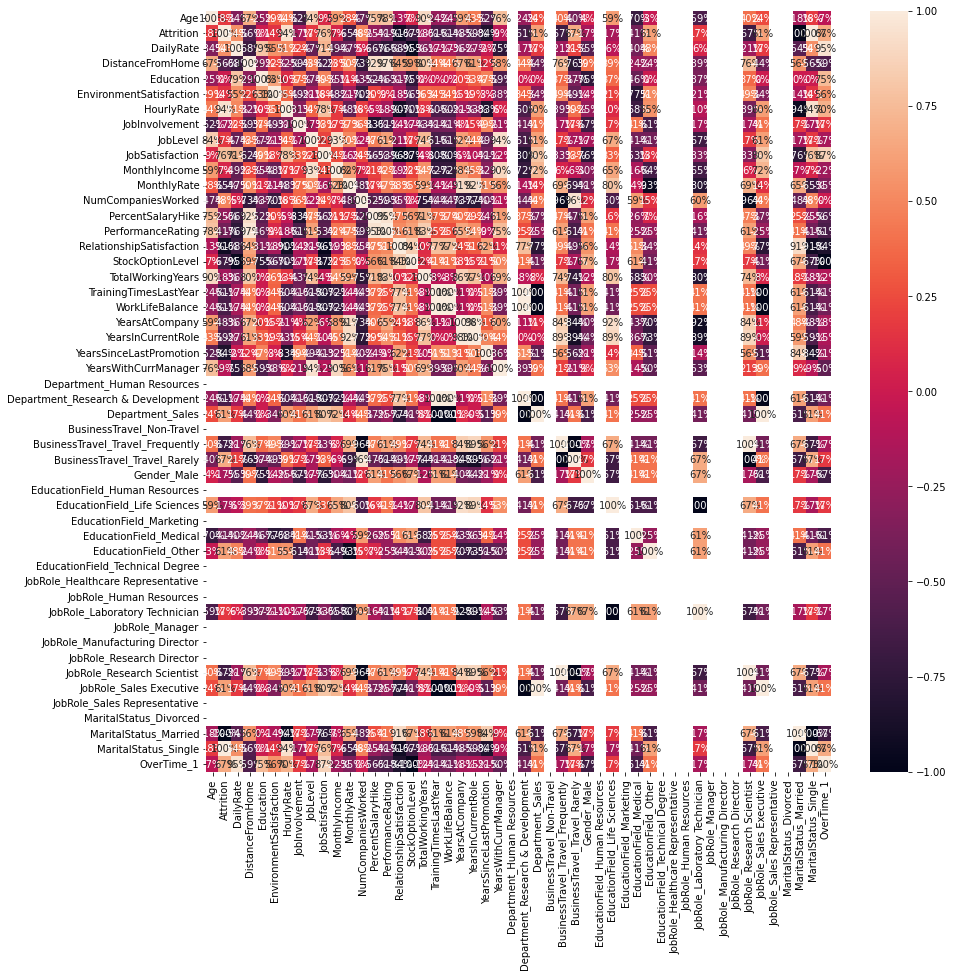

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot = True, fmt = '.0%')

In [ ]:
X = data.iloc[:, 0:data.shape[1]-1].values
Y = data.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
#Score of the train
forest.score(X_train, Y_train)

1.0

In [ ]:
#Accuracy on test
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))
print(cm)

[[0 0]
 [2 0]]


In [ ]:
#### 1st Model: Logistic Regression


In [ ]:
#### Logistic Regression using 70-30 split, L2 penalty ####


In [ ]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(multi_class='auto', penalty='l2', solver = 'liblinear' )
logit_model = Classifier.fit(Xtrain,ytrain)
y_pred_logit= logit_model.predict(Xtest)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logit_model.score(Xtest, ytest)))

Accuracy of logistic regression classifier on test set: 0.89


In [ ]:
#### printing the confusion matrix ####


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, y_pred_logit)
print(cm)
accuracy_score(ytest,y_pred_logit)

[[2481   18]
 [ 294  159]]


0.8943089430894309

In [ ]:
### printing the performance report ###


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_logit))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2499
           1       0.90      0.35      0.50       453

    accuracy                           0.89      2952
   macro avg       0.90      0.67      0.72      2952
weighted avg       0.89      0.89      0.87      2952



In [ ]:
#### plotting the ROC ####

In [ ]:
import sklearn.metrics as metrics
probs = logit_model.predict_proba(Xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

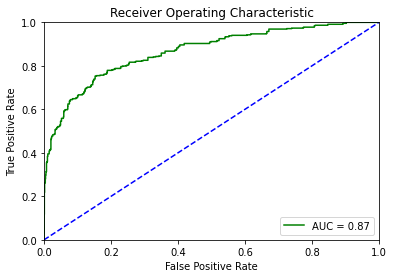

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'green', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
##### Logistic Regression using K fold cross validation and L1 penalty #######

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, shuffle=True, random_state=1)
model_with_crossvalidation = LogisticRegression(multi_class='auto', penalty='l1', solver = 'liblinear' )
scores = cross_val_score(model_with_crossvalidation, x_df, y_df, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.889 (0.011)


In [ ]:
##### Model 2: Ensemble Methods: Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(max_depth = 5,random_state = 0, criterion = 'gini')
Random_model = Classifier.fit(Xtrain,ytrain)
y_pred_RF= Random_model.predict(Xtest)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(Random_model.score(Xtest, ytest)))

Accuracy of Random Forest classifier on test set: 0.88


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_RF))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2499
           1       0.98      0.22      0.35       453

    accuracy                           0.88      2952
   macro avg       0.93      0.61      0.64      2952
weighted avg       0.89      0.88      0.84      2952



In [ ]:
## ROC Curve using Random Forest Classifier ###

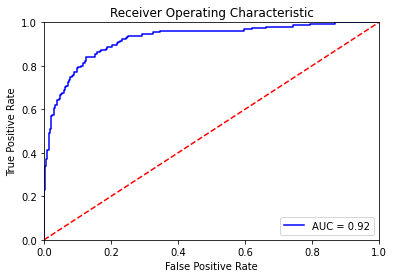

In [ ]:
probs = Random_model.predict_proba(Xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'blue', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot as plt

<Figure size 3600x3600 with 0 Axes>

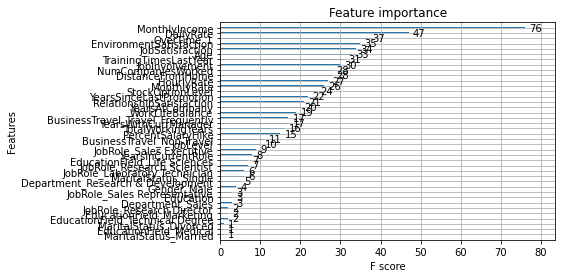

In [ ]:
model_XG = XGBClassifier()
model_XGBoost = model_XG.fit(Xtrain,ytrain)
plt.figure(figsize=(50,50))
plot_importance(model_XGBoost)

plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier  ##RFE using estimator = Decision Tree Classifier
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=50)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
cv = KFold(n_splits=10, random_state=None)
n_scores = cross_val_score(pipeline,x_df, y_df, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# evaluate model

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 1.000 (0.000)


In [ ]:
from sklearn.feature_selection import RFECV
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=KFold(10), scoring='accuracy')
rfecv.fit(Xtrain, ytrain)
print('Optimal number of features: {}'.format(rfecv.n_features_))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


Optimal number of features: 13


In [ ]:
#### Key take aways: Monthly Income, Monthly Rate, Hourly Rate, Distance from home, Age, and Environment Satisfaction are the top 6 features, impacting the Attrition.


In [ ]:
#### Key Take-Aways:

# Logistic Regression using 70-30 split of train-test data, and L2 penalty, yielded 88% accuracy.
# Logistic Regression using K fold cross validation and L1 penalty, yielded 88.9% accuracy.
# Ensemble Method: Random Forest Classifier, with 70-30 split of train-test data yielded 84% accuracy.
# Random Forest Classifier, with Recursive Feature Elimination, and Cross Validation yielded 88% accuracy.
# Feature Importances are visualised in descending order, starting with the top most impactful feature, from the set of 50 features 